In [2]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

# MNIST 
Creating a trained netword for testing

In [72]:
# MNIST neural net
class MNIST(nn.Module):

    def __init__ (self):
        super(MNIST, self).__init__()
        self.pic_size = 28 * 28
        self.classes = 10
        hidden_layer_size = 100

        self.lin1 = nn.Linear(self.pic_size, hidden_layer_size)
        self.relu1 = nn.ReLU()

        self.lin2 = nn.Linear(hidden_layer_size, hidden_layer_size)
        self.relu2 = nn.ReLU()

        self.lin3 = nn.Linear(hidden_layer_size, hidden_layer_size)
        self.relu3 = nn.ReLU()

        self.lin_final = nn.Linear(hidden_layer_size, self.classes)
        self.softmax = nn.LogSoftmax()

    def forward(self, x):
        x = x.view(-1, self.pic_size)
        x = self.lin1(x)
        x = self.relu1(x)
        x = self.lin2(x)
        x = self.relu2(x)
        x = self.lin3(x)
        x = self.relu3(x)
        x = self.lin_final(x)
        x = self.softmax(x)
        return x

network = MNIST()

In [73]:
# datasets
BATCH_SIZE = 64

trainset = torchvision.datasets.MNIST(
    '/files/', 
    train=True,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)

testset = torchvision.datasets.MNIST(
    '/files/', 
    download=True, 
    transform=torchvision.transforms.ToTensor()
)

train_loader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    testset, 
    batch_size=BATCH_SIZE,
    shuffle=True,
)

In [74]:
def train(
    network,
    train_loader,
    criterion = nn.CrossEntropyLoss(),
    optimizer = optim.SGD,
    num_epochs = 10,
    learning_rate = .1,
):
    optimizer = optimizer(network.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        epoch_loss = 0.0

        for batch_idx, sample in enumerate(train_loader):
            pics, labels = sample
            labels = F.one_hot(labels, num_classes=10)
            optimizer.zero_grad()
            outputs = network(pics)
            loss = criterion(outputs, labels.to(torch.float))
            loss.backward()
            optimizer.step()
            epoch_loss += loss

        print(f"epoch: {epoch}, loss: {epoch_loss}")

train(network, train_loader)

C:\Users\guilh\AppData\Local\Temp\ipykernel_15108\1990201869.py:31: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


epoch: 0, loss: 597.8067016601562
epoch: 1, loss: 165.23733520507812
epoch: 2, loss: 110.61743927001953
epoch: 3, loss: 85.61473846435547
epoch: 4, loss: 68.15642547607422
epoch: 5, loss: 57.68968200683594
epoch: 6, loss: 48.515567779541016
epoch: 7, loss: 40.933692932128906
epoch: 8, loss: 35.55086898803711
epoch: 9, loss: 29.528057098388672


In [75]:
def test(
    network, 
    test_loader,
    criterion = nn.CrossEntropyLoss(),
): 
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad(): 
        for data, target in test_loader:
            output = network(data)
            correct += sum(target == output.argmax(axis=1))
            labels = F.one_hot(target, num_classes=10)
            test_loss += criterion(output, labels.to(torch.float))
        test_loss /= len(test_loader.dataset)

        print(f"Test set: avg loss {test_loss}, accuracy: {100*correct/len(test_loader.dataset):.2f}%")
    
test(network, test_loader)

C:\Users\guilh\AppData\Local\Temp\ipykernel_15108\1990201869.py:31: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


Test set: avg loss 0.000602699990849942, accuracy: 98.73%


# ABS


In [76]:
print(network)

MNIST(
  (lin1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (lin2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (lin3): Linear(in_features=100, out_features=100, bias=True)
  (relu3): ReLU()
  (lin_final): Linear(in_features=100, out_features=10, bias=True)
  (softmax): LogSoftmax(dim=None)
)


In [77]:
abs_loader = torch.utils.data.DataLoader(
    testset, 
)

[]

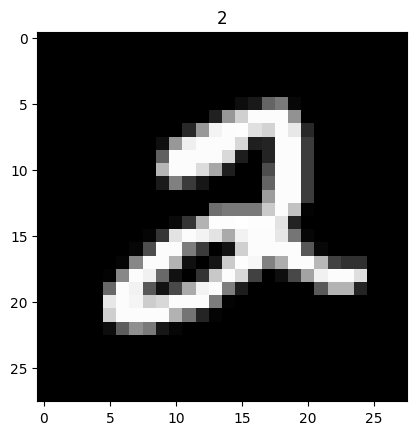

In [78]:
seed = 5
benign_image = abs_loader.dataset[seed][0][0]
label = abs_loader.dataset[seed][1]
plt.imshow(benign_image, cmap='gray')
plt.title(label)
plt.plot()

In [79]:
activations = network(benign_image)
activations

C:\Users\guilh\AppData\Local\Temp\ipykernel_15108\1990201869.py:31: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


tensor([[-14.7765,  -7.9678,  -0.0411,  -3.7311, -14.2430, -13.4170, -18.9131,
          -4.1771,  -7.3584, -11.3856]], grad_fn=<LogSoftmaxBackward0>)

In [80]:
params = list(network.parameters())

[par.shape for par in params]
# we see pairs of matrices and biases
# to change the individual neuron activation, we need to change the biases

[torch.Size([100, 784]),
 torch.Size([100]),
 torch.Size([100, 100]),
 torch.Size([100]),
 torch.Size([100, 100]),
 torch.Size([100]),
 torch.Size([10, 100]),
 torch.Size([10])]

In [81]:
last_layer = params[-1]
last_layer[0]

tensor(-0.1765, grad_fn=<SelectBackward0>)

In [82]:
model = network

In [83]:
model(benign_image)

C:\Users\guilh\AppData\Local\Temp\ipykernel_15108\1990201869.py:31: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


tensor([[-14.7765,  -7.9678,  -0.0411,  -3.7311, -14.2430, -13.4170, -18.9131,
          -4.1771,  -7.3584, -11.3856]], grad_fn=<LogSoftmaxBackward0>)

In [84]:
model.state_dict()

OrderedDict([('lin1.weight',
              tensor([[ 0.0311,  0.0173, -0.0059,  ...,  0.0008, -0.0298, -0.0350],
                      [ 0.0209, -0.0280,  0.0352,  ..., -0.0153, -0.0272,  0.0118],
                      [ 0.0069, -0.0320, -0.0029,  ..., -0.0310, -0.0119,  0.0145],
                      ...,
                      [-0.0189,  0.0327, -0.0299,  ..., -0.0051,  0.0337, -0.0025],
                      [ 0.0324, -0.0264, -0.0013,  ...,  0.0163, -0.0043, -0.0111],
                      [ 0.0022,  0.0349,  0.0207,  ...,  0.0181, -0.0292, -0.0143]])),
             ('lin1.bias',
              tensor([ 0.0465, -0.0033, -0.1511,  0.0287,  0.1649, -0.1343,  0.0510,  0.1876,
                      -0.1513,  0.0083,  0.1440, -0.0435,  0.0014, -0.0116,  0.0976, -0.0441,
                       0.1341, -0.0864,  0.0403,  0.0917,  0.0038,  0.0452, -0.0419,  0.0283,
                       0.0599,  0.0080,  0.2478, -0.0437,  0.0588, -0.0084,  0.1189,  0.0085,
                      -0.0721,  0.

In [85]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        # print()
        activation[name] = output.detach()
    return hook

model.lin1.register_forward_hook(get_activation('lin12'))
output = model(benign_image)
# print(activation['lin1'])

C:\Users\guilh\AppData\Local\Temp\ipykernel_15108\1990201869.py:31: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


In [86]:
# dummy model

class Dummy(nn.Module):
    def __init__(self): 
        super(Dummy, self).__init__()
        self.lin1 = nn.Linear(2, 2)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(2, 2)
        self.relu2 = nn.ReLU()
    
    def forward(self, x):
        x = self.lin1(x)
        x = self.relu1(x)
        x = self.lin2(x)
        x = self.relu2(x)
        return x

dummy = Dummy()

In [87]:
dummy.state_dict()

OrderedDict([('lin1.weight',
              tensor([[-0.1955,  0.0741],
                      [-0.1511,  0.3093]])),
             ('lin1.bias', tensor([-0.1308, -0.6364])),
             ('lin2.weight',
              tensor([[-0.0148,  0.0326],
                      [ 0.2177, -0.5905]])),
             ('lin2.bias', tensor([0.5789, 0.0969]))])

In [88]:
x = [1, 1]
x = torch.Tensor(x)
dummy(x)

tensor([0.5789, 0.0969], grad_fn=<ReluBackward0>)

In [89]:
# sucessful hook approach to modify activations
def get_activation(neuron, activation):
    def hook(model, input, output):
        modified_out = output.detach()
        modified_out[neuron] = activation
        return modified_out
    return hook

hook_handle = dummy.lin2.register_forward_hook(get_activation(1, 2))
output = dummy(x)
print(output)
hook_handle.remove()

tensor([0.5789, 2.0000])


In [134]:
# dummy model with abs support

from typing import Tuple, List, Callable

def modify_activation(neuron, activation):
    def hook(model, input, output):
        modified_out = output.detach()
        modified_out[neuron] = activation
        return modified_out
    return hook
    
def NSF(model, label: int, layer: nn.Module, neuron: int, image: torch.Tensor) -> Callable:
    def func(x: float) -> float:
        hook_handle = layer.register_forward_hook(modify_activation(neuron, x))
        output = model(image)
        hook_handle.remove()
        return output[label]
    return func


def get_neurons(model) -> List[Tuple[nn.Module, int]]:
    """
        Returns a list of tuples containing the layers in which the neurons are in
        and the number of neurons in that layer.
    """
    return [
        *[(model.lin1, i) for i in range(2)],
        *[(model.lin2, i) for i in range(2)],
    ]
    
def get_labels(model) -> List[int]:
    """
        Returns the list of labels in the model, 
        aka the last layer neurons.
    """
    return [0, 1] # two values for output

In [133]:
def identify_candidate(C, neurons, labels, base_imgs):
    """
        C: the model in question
        base_imgs: list of tuples containing (image, label)
    """
    max_n = 0
    max_l = None
    max_v = 0
    for layer, neuron in neurons:
        labelLift = []
        for label in labels:
            min_img_v = float('inf')
            for img in base_imgs:
                image, img_label = img
                if img_label == label: continue
                x = torch.linspace(-1, 1, 100)
                img_v = max(
                    NSF(C, label, layer, neuron, image)(xx)
                    for xx in x
                    ) - C(image)[label]
                min_img_v = min(min_img_v, img_v)
            labelLift.append(min_img_v)
        labelLift.sort(reverse=True)
        n_v = labelLift[0] - labelLift[1]
        if n_v > max_v:
            max_v = n_v
            max_n = neuron
            max_l = layer
    return max_l, max_n



In [135]:
C = Dummy()
neurons = get_neurons(C)
labels = get_labels(C)
base_imgs = [
    (torch.rand(2), np.random.choice(labels)) for _ in range(20)
]

identify_candidate(C, neurons, labels, base_imgs)

(Linear(in_features=2, out_features=2, bias=True), 0)

# abs on MNIST
debugging

In [188]:
def identify_candidate(C, neurons, labels, base_imgs):
    """
        C: the model in question
        base_imgs: list of tuples containing (image, label)
    """
    max_n = 0
    max_l = None
    max_v = float('-inf')
    for layer, neuron in neurons:
        labelLift = []
        for label in labels:
            min_img_v = float('inf')
            for img in base_imgs:
                image, img_label = img
                if img_label == label: continue
                x = torch.linspace(-1, 1, 100)
                img_v = NSF(C, label, layer, neuron, image)(x).max() - C(image)[0, label]
                img_v = img_v.item()
                if img_v < min_img_v: 
                    min_img_v = img_v
            labelLift.append(min_img_v)
        labelLift.sort(reverse=True)
        if labelLift[0] is not torch.inf:
            n_v = labelLift[0] - labelLift[1]
        else: n_v = 0
        if n_v > max_v:
            max_v = n_v
            max_n = neuron
            max_l = layer
    return max_l, max_n


In [189]:
def get_neurons(model) -> List[Tuple[nn.Module, int]]:
    """
        Returns a list of tuples containing the layers in which the neurons are in
        and the number of neurons in that layer.
    """
    return [
        *[(model.lin1, i) for i in range(100)],
        *[(model.lin2, i) for i in range(100)],
        *[(model.lin3, i) for i in range(100)],
        *[(model.lin_final, i) for i in range(28*28)],
    ]
    
def get_labels(model) -> List[int]:
    """
        Returns the list of labels in the model, 
        aka the last layer neurons.
    """
    return [i for i in range(10)] # two values for output

In [190]:
# testing it on a clean network
C = network
neurons = get_neurons(C)
labels = get_labels(C)
base_imgs = torch.utils.data.DataLoader(
    testset, batch_size=1, shuffle=True
)

base_imgs = map(lambda tup: (tup[0][0], tup[1][0]), base_imgs)

identify_candidate(C, neurons, labels, base_imgs)

C:\Users\guilh\AppData\Local\Temp\ipykernel_15108\1990201869.py:31: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


(None, 0)